In [119]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [120]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [136]:
response.encoding = 'utf-8'

In [155]:
from google.colab import files

# Upload a file using files.upload()
uploaded = files.upload()

# Get the file name
Mashikh = next(iter(uploaded))

# Read the contents of the file using open() with encoding='utf-8'
with open(Mashikh, 'r', encoding='utf-8') as file:
    Mashikh = file.read()

# Print the contents of the file
print(Mashikh)


Saving Mashiakh.txt to Mashiakh (3).txt
﻿.1
آتش ناامید پیشه گی ام 
غیر من هر که را گرفت، نسوخت 
نرسیدن به من رسید از راه 
گام بر گام و لب به لب را دوخت 
 
قله ی فتح کرده ام که نپرس 
قله ی منحنی بدبختی 
قهرمان ساخت صبر و صبر مرا 
آدمک آهنی  بدبختی 
 
اشک بیش، آه بیش و دیگر هیچ 
از سری بیش ها کمی دارم  
خیر و شر را به جا نمی آرم 
آرزو های مبهمی دارم 
 
دور تر رفت و خون به بارآورد 
فکر من دور از  اتاق مباد 
عشقبازی محرک سکس است 
نامی از ما بر این رواق مباد 
 
پای من سمت آسمان جاریست 
در هوا....نه! هواست مسند من 
پایه ی محکمیست مرگ و یکیست 
سنگ تهداب و سنگ مرقد من 2. 
من، گفتگوی درهم چندین من 
دردی به بار آمده در خلوت 
مخروبه های ذهن خور معنا 
خارج شدند از رده در خلوت 
اندام بی تناظر افتاده 
در انتهای یک سده، در خلوت 
در سگستان بی رمق هستی 
سر می زنم به قی کده در خلوت 
غولی شدم به رسم نبودن ها 
با ایده های سم زده در خلوت 3. 
اگرچه شدت آز من، آز تکنفره ست 
نیاز من به تو بیش از نیاز تکنفره ست 
محیط ذهن من انگار جای هر کس نیست 
فضای حادثه پرداز باز تکنفره ست 
فقط من و من و من با کنایه باخبریم

In [138]:
# Split the string into words using the .split() method
words = Mashikh.split()

# Reverse the order of the words in the list using slicing
reversed_words = words[::-1]

# Join the words back together using the .join() method
Mashikh_r= " ".join(reversed_words)

# Print the reversed string
print(Mashikh_r)


شان ای جانه شد جزیره یک به تبدیل گریست که بس از و کشید سر پنجره از خانه این شد چیره بود که چه هر بر خانه این شد تیره و خویش به پیچید .83 شده آب هم آب زیاد شرم از دیدی را خود عکس آب در وقتیکه شده آب عدم در وجود چه هر یا شده آب کم و بیش و است کوه دریا .82 افتی می هدر وقت نده هشدار! است عشق نامش که پلی نازک مو از افتی اگر،می لغزید تو پاهای افتی نظر،می کنی سو سو،آن این .81 شده نشئه ،خدا آن از کمی نوشیده برود بالا به که آبش شد تبخیر شده نشئه جدا جدا جدا موج هر شده نشئه پا و سر دریا تو لمس با .80 شد فربه تو، خاطرات که انگار مرا اعصاب خورد روز و شب بس از شد فربه بو، نبرد او من عشق از شد فربه خو، گرفت کس و ناکس با .79 من ای تنهایی من با شد همبستر امشب تخت در تو جای و آمدی دیر من زاییدن،تنهایی خواهد غم من آبستن،تنهایی شود شاید .78 است فریاد ای نشانه کامل ماهِ است لبخند مظهر هلال چند هر است فریاد ای کودکانه ای چهره یا است فریاد ای آستانه در لبخند .77 بدیست حسّ بودن من من، از بگذر بمان تو اما تو ام تو من از بیش من ست بدی حس من خوب حس که انگار ست بدی حس رقصیدن یا خندیدن .76 سوزی آتش حادثه این به گ

In [139]:
tokenizer = Tokenizer()
max_sequence_len = 6
sentences=[]
alltext=[]
corpus = Mashikh
alltext.append(corpus)
words = corpus.split(" ")
range_size = len(words)-max_sequence_len
for i in range(0, range_size):
	thissentence=""
	for word in range(0, max_sequence_len-1):
		word = words[i+word]
		thissentence = thissentence + word
		thissentence = thissentence + " "
	sentences.append(thissentence)
 

oov_tok = "<OOV>"
vocab_size=2700
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok, split=" ", char_level=False)
tokenizer.fit_on_texts(alltext)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

input_sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
#max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

{'<OOV>': 1, 'به': 2, 'در': 3, 'از': 4, 'و': 5, 'تو': 6, 'من': 7, 'که': 8, 'ای': 9, 'است': 10, 'می': 11, 'را': 12, 'با': 13, 'هر': 14, 'خود': 15, 'این': 16, 'ها': 17, 'نیست': 18, 'ست': 19, 'های': 20, 'ام': 21, 'مرا': 22, 'سر': 23, 'شد': 24, 'ترا': 25, 'یک': 26, 'هم': 27, 'نمی': 28, 'بی': 29, 'نگاه': 30, 'تر': 31, 'اند': 32, 'بود': 33, 'شده': 34, 'برای': 35, 'کرده': 36, 'همه': 37, 'چه': 38, 'ما': 39, 'یا': 40, 'بر': 41, 'آن': 42, 'چشم': 43, 'تا': 44, 'بودن': 45, 'باز': 46, 'کرد': 47, 'پس': 48, 'سرم': 49, 'نه': 50, 'من،': 51, 'پر': 52, 'آرزو': 53, '،': 54, 'شهر': 55, 'شب': 56, 'ی': 57, 'دل': 58, 'تن': 59, 'شاید': 60, 'چند': 61, 'او': 62, 'راه': 63, 'آه': 64, 'دور': 65, 'حال': 66, 'روی': 67, 'عشق': 68, 'شود': 69, 'توست': 70, 'پا': 71, 'کسی': 72, 'خواب': 73, 'زمان': 74, 'پنجره': 75, 'پی': 76, 'ذهن': 77, 'هستی': 78, 'ایم': 79, 'کنم': 80, 'آب': 81, 'گراز': 82, 'کن': 83, 'بیهوده': 84, 'رها': 85, 'وطن': 86, 'اگر': 87, 'دادم': 88, 'هیچ': 89, 'رفت': 90, 'انگار': 91, 'فقط': 92, 'کم': 93, 'ندیده':

In [140]:
print(xs.shape)

(29787, 5)


In [141]:
print(xs[:20])

[[  0   0   0   0 808]
 [  0   0   0 808 809]
 [  0   0 808 809 104]
 [  0 808 809 104 810]
 [808 809 104 810 811]
 [809 104 810 811 314]
 [  0   0   0   0 810]
 [  0   0   0 810 811]
 [  0   0 810 811 314]
 [  0 810 811 314  21]
 [  0   0   0   0 811]
 [  0   0   0 811 314]
 [  0   0 811 314  21]
 [  0 811 314  21 129]
 [  0   0   0   0 314]
 [  0   0   0 314  21]
 [  0   0 314  21 129]
 [  0 314  21 129   7]
 [  0   0   0   0  21]
 [  0   0   0  21 129]]


In [142]:
model = Sequential()
model.add(Embedding(total_words, 16, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)
model.save("bidiirish2.h5")

Epoch 1/100
931/931 [==============================] - 30s 22ms/step - loss: 6.7418 - accuracy: 0.0328
Epoch 2/100
931/931 [==============================] - 19s 21ms/step - loss: 6.3096 - accuracy: 0.0364
Epoch 3/100
931/931 [==============================] - 20s 22ms/step - loss: 6.0111 - accuracy: 0.0468
Epoch 4/100
931/931 [==============================] - 20s 21ms/step - loss: 5.7486 - accuracy: 0.0570
Epoch 5/100
931/931 [==============================] - 19s 20ms/step - loss: 5.5065 - accuracy: 0.0705
Epoch 6/100
931/931 [==============================] - 21s 22ms/step - loss: 5.2767 - accuracy: 0.0868
Epoch 7/100
931/931 [==============================] - 20s 21ms/step - loss: 5.0703 - accuracy: 0.1017
Epoch 8/100
931/931 [==============================] - 20s 22ms/step - loss: 4.8664 - accuracy: 0.1201
Epoch 9/100
931/931 [==============================] - 19s 21ms/step - loss: 4.6737 - accuracy: 0.1379
Epoch 10/100
931/931 [==============================] - 20s 22ms/step - l

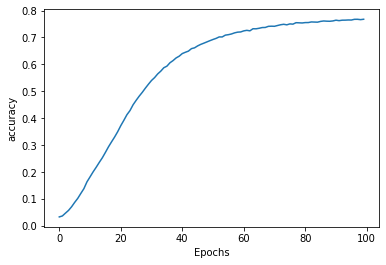

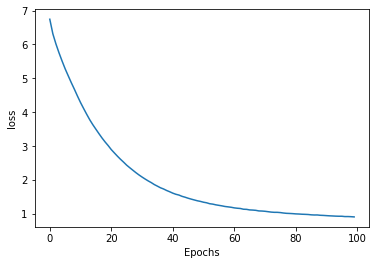

In [143]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')


# Text Generator
(based on words)

In [146]:
seed_text = "نقاش ازل به"

# # Split the string into words using the .split() method
# words = seed_text_r.split()

# # Reverse the order of the words in the list using slicing
# reversed_words = words[::-1]

# # Join the words back together using the .join() method
# seed_text = " ".join(reversed_words)
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = ""
    # get the index of the maximum value in the predicted array
    pred_index = np.argmax(predicted)
    for word, index in tokenizer.word_index.items():
        if index == pred_index:
            output_word = word
            break
    seed_text += " " + output_word


# # Split the string into words using the .split() method
# words = seed_text.split()

# # Reverse the order of the words in the list using slicing
# reversed_words = words[::-1]

# # Join the words back together using the .join() method
# seed_text = " ".join(reversed_words)


print(seed_text)


نقاش ازل به خدا خاست نیستم بین حجاب شعله ورم گیر کرده ام را کم نکرد سیل آمد، برد با خود باور به توان دیگری کشوری را با بر من این همه اندوه را آبشخور اندوه می بینی آینده خود مختصر ندید و به سوی تو خوانده نگاه سوت غریبی ست نگاه مثل صدا نیست صدا سکوت غریبی ست نه، نه، نگاه پرنده ست پرش سقوط غریبی ست نگاه مثل صدا نیست صدا سکوت غریبی ست نه، نه، نگاه پرنده ست پرش سقوط غریبی ست نگاه مثل صدا نیست صدا سکوت غریبی ست نه، نه، نگاه پرنده ست پرش سقوط غریبی ست نگاه


# Text Generator
(based on sentence)


In [147]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [148]:
tokenizer = Tokenizer()

corpus = Mashikh.split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [149]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [150]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])

In [159]:
seed_text = "محدود به خود بکن جهان را "
# Split the string into words using the .split() method
words = seed_text_r.split()

# Reverse the order of the words in the list using slicing
reversed_words = words[::-1]

# Join the words back together using the .join() method
seed_text = " ".join(reversed_words)
next_words = 100

In [160]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = ""
    # get the index of the maximum value in the predicted array
    pred_index = np.argmax(predicted)
    for word, index in tokenizer.word_index.items():
        if index == pred_index:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

بتا برخیز گودال در بین و بالا تر تو نیست،تکی، که اینجا، را تخت ی تو ای از نه تمام های که که که که که این خود ، گنگم روشن داده هر لبم ذوق نه،سلطه همه مرا تو بیشترم شوید آفتاب،آب،گندم من فتح فربه با جرقه که انگار فربه مرا و تک نیست را خودش زندگی خود ای خواب تن آنچه ای شده اند تو موج من، گروه بر یک انگار دیدن عدم فاجعه نیست که را لمس تو در خود فراگرفت است را شوی در زمان تکنفره افتاد ام فراگرفت فربه ام ضعیف عمری معترض است در بین انتها اگر
